<a href="https://colab.research.google.com/github/namangarg1805/Data-Analytics/blob/main/NLP_tweets_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Content


In [22]:
import os
import re
import random
import string      # for string operations
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import plotly.express as px
# SetUp NLTK
!pip install --user -U nltk
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [23]:
!gdown 11LWo5nagSmC72hOJM9lm2l05sdQxt4rf

Downloading...
From: https://drive.google.com/uc?id=11LWo5nagSmC72hOJM9lm2l05sdQxt4rf
To: /content/corona_tweets.csv
100% 1.00M/1.00M [00:00<00:00, 22.0MB/s]


In [24]:
df = pd.read_csv("./corona_tweets.csv")
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,1,44953,NYC,02-03-2020,TRENDING: New Yorkers encounter empty supermar...,Extremely Negative
1,2,44954,"Seattle, WA",02-03-2020,When I couldn't find hand sanitizer at Fred Me...,Positive
2,3,44955,NaN,02-03-2020,Find out how you can protect yourself and love...,Extremely Positive
3,4,44956,Chicagoland,02-03-2020,#Panic buying hits #NewYork City as anxious sh...,Negative
4,5,44957,"Melbourne, Victoria",03-03-2020,#toiletpaper #dunnypaper #coronavirus #coronav...,Neutral


### Exploring the labels

In [25]:
fig = px.pie(df, names='Sentiment',hole=0.3, title='Sentiment Pie Chart')
fig.show()

In [26]:
labels = df['Sentiment'].unique()
labels
res = df['Sentiment'].value_counts().reset_index()

Text(0.5, 1.0, 'Sentiment Pie Chart')

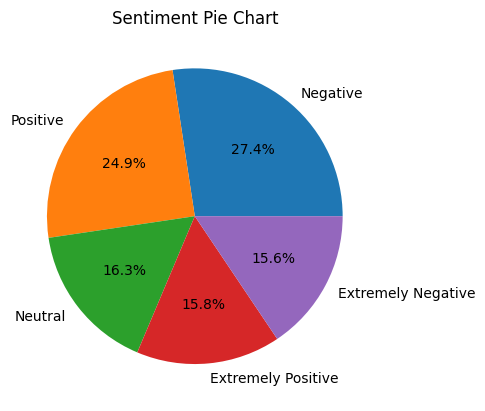

In [27]:
labels = np.array(res['Sentiment'])
data = np.array(res['count'])
plt.pie(data,labels = labels,autopct='%1.1f%%')
plt.title("Sentiment Pie Chart")

### Splitting the dataset into training and testing


In [28]:
# Separating positive_tweets and negative_tweets
all_positive_tweets = list(df[df['Sentiment'] == 'Positive']['OriginalTweet'].astype(str)) # Making equal positive and negative tweet counts
all_negative_tweets = list(df[df['Sentiment'] == 'Negative']['OriginalTweet'].astype(str))[:947]

# Splitting training and testing set. 80/20 split
positive_train, positive_test = train_test_split(all_positive_tweets, test_size=0.2, random_state=42)
negative_train, negative_test = train_test_split(all_negative_tweets, test_size=0.2, random_state=42)

print("Size of training dataset: ",len(positive_train) + len(negative_train))
print("Size of testing dataset: ", len(positive_test)  + len(negative_test))

# print positive in green
print('\033[92m' + '\npositive in green: ')
print('\033[92m' + all_positive_tweets[random.randint(0,947)])
print('\033[91m' + '\nnegative in red: ')
# print negative in red
print('\033[91m' + all_negative_tweets[random.randint(0,947)])

Size of training dataset:  1514
Size of testing dataset:  380

positive in green: 
Was just in the grocery store for over an hour, waiting in line.... made friends with the guy in line in front of us and he bought us ice cream (wrapped in individual packages, before you trolls hop on my tweet). #Covid_19 stories

negative in red: 
Just been to B&amp;Q in Renfrew. There's a jar of pasta twists sitting in one of the kitchen displays if anyone is desperate #coronavirus #StopPanicBuying


**Note:** A lot of unnecessary words like hashtags, hyperlinks are also tokenized.

## 1.3 Can we reduce dataset size?

<!-- Do we need hashtags and hyperlinks for analyzing the tweets? -->

<!-- ### What kind of textual data can we remove from the tweets? -->
### What are the unwanted textual data?

<details>
<summary>
    <font size="3" color=""><b>Answer</b></font>
</summary>
<p>
<ol>
    <li>Remove hashtags and hyperlinks before tokenization.</li>
    <li>Remove stopwords and punctuations.</li>
    
</ol>
</p>








In [29]:
import nltk                                # Python library for NLP
from nltk.corpus import twitter_samples    # sample Twitter dataset from NLTK
from nltk.corpus import stopwords          # module for stop words that come with NLTK
from nltk.stem import PorterStemmer        # module for stemming
from nltk.stem import WordNetLemmatizer    # module for Lemmatization
from nltk.tokenize import TweetTokenizer
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download("stopwords")


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [30]:
# Our selected sample. Complex enough to exemplify each step
tweet = all_positive_tweets[12]
tweet

'Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT'

In [31]:
def process_tweet(tweet):
    lemmatizer = WordNetLemmatizer()
    stopwords_english = stopwords.words('english')
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # remove old style retweet text "RT"
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # remove hyperlinks
    tweet = re.sub(r'https?://[^\s\n\r]+', '', tweet)
    # remove hashtags
    # only removing the hash # sign from the word
    tweet = re.sub(r'#', '', tweet)
    # tokenize tweets
    tokenizer = TweetTokenizer(preserve_case=False, strip_handles=True,
                               reduce_len=True)
    tweet_tokens = tokenizer.tokenize(tweet)

    tweets_clean = []
    for word in tweet_tokens:
        if (word not in stopwords_english and  # remove stopwords
                word not in string.punctuation):  # remove punctuation
            # tweets_clean.append(word)
            lemma_word = lemmatizer.lemmatize(word)  # stemming word
            tweets_clean.append(lemma_word)

    return tweets_clean

In [32]:
# choose the same tweet
tweet = all_positive_tweets[12]

print()
print('\033[92m')
print(tweet)
print('\033[94m')

# call the imported function
tweets_stem = process_tweet(tweet); # Preprocess a given tweet

print('preprocessed tweet:')
print(tweets_stem) # Print the result



Consumers have increased their online shopping due to coronavirus. https://t.co/5mYfz3RAD0 #retail #ecommerce #study #coronavirus https://t.co/Dz3H6zrWUT

preprocessed tweet:
['consumer', 'increased', 'online', 'shopping', 'due', 'coronavirus', 'retail', 'ecommerce', 'study', 'coronavirus']


In [33]:
def build_freqs(tweets, ys):
    # Convert np array to list since zip needs an iterable.
    # The squeeze is necessary or the list ends up with one element.
    # Also note that this is just a NOP if ys is already a list.
    yslist = np.squeeze(ys).tolist()

    # Start with an empty dictionary and populate it by looping over all tweets
    # and over all processed words in each tweet.
    freqs = {}
    for y, tweet in zip(yslist, tweets):
        for word in process_tweet(tweet):
            pair = (word, y)
            if pair in freqs:
                freqs[pair] += 1
            else:
                freqs[pair] = 1

    return freqs

In [34]:
training_tweets = positive_train + negative_train
# make a numpy array representing labels of the tweets
labels = np.append(np.ones((len(positive_train))), np.zeros((len(negative_train))))

In [35]:
# create frequency dictionary
freqs = build_freqs(training_tweets, labels)

# check data type
print(f'type(freqs) = {type(freqs)}')

# check length of the dictionary
print(f'len(freqs) = {len(freqs)}')

type(freqs) = <class 'dict'>
len(freqs) = 7985


In [36]:
# select some words to appear in the report.
keys = ['void', 'commun', 'spirit', 'stop', 'merri', 'nice', 'good', 'bad', 'sad', 'mad', 'best', 'pretti',
        ':)', ':(', 'song', 'idea', 'power', 'play']

# list representing our table of word counts.
# each element consist of a sublist with this pattern: [<word>, <positive_count>, <negative_count>]
data = []

# loop through our selected words
for word in keys:

    # initialize positive and negative counts
    pos = 0
    neg = 0

    # retrieve number of positive counts
    if (word, 1) in freqs:
        pos = freqs[(word, 1)]

    # retrieve number of negative counts
    if (word, 0) in freqs:
        neg = freqs[(word, 0)]

    # append the word counts to the table
    data.append([word, pos, neg])

data

[['void', 1, 0],
 ['commun', 0, 0],
 ['spirit', 1, 2],
 ['stop', 11, 23],
 ['merri', 0, 0],
 ['nice', 6, 6],
 ['good', 49, 28],
 ['bad', 1, 8],
 ['sad', 0, 5],
 ['mad', 1, 4],
 ['best', 7, 3],
 ['pretti', 0, 0],
 [':)', 1, 1],
 [':(', 3, 0],
 ['song', 2, 0],
 ['idea', 6, 8],
 ['power', 3, 0],
 ['play', 4, 1]]

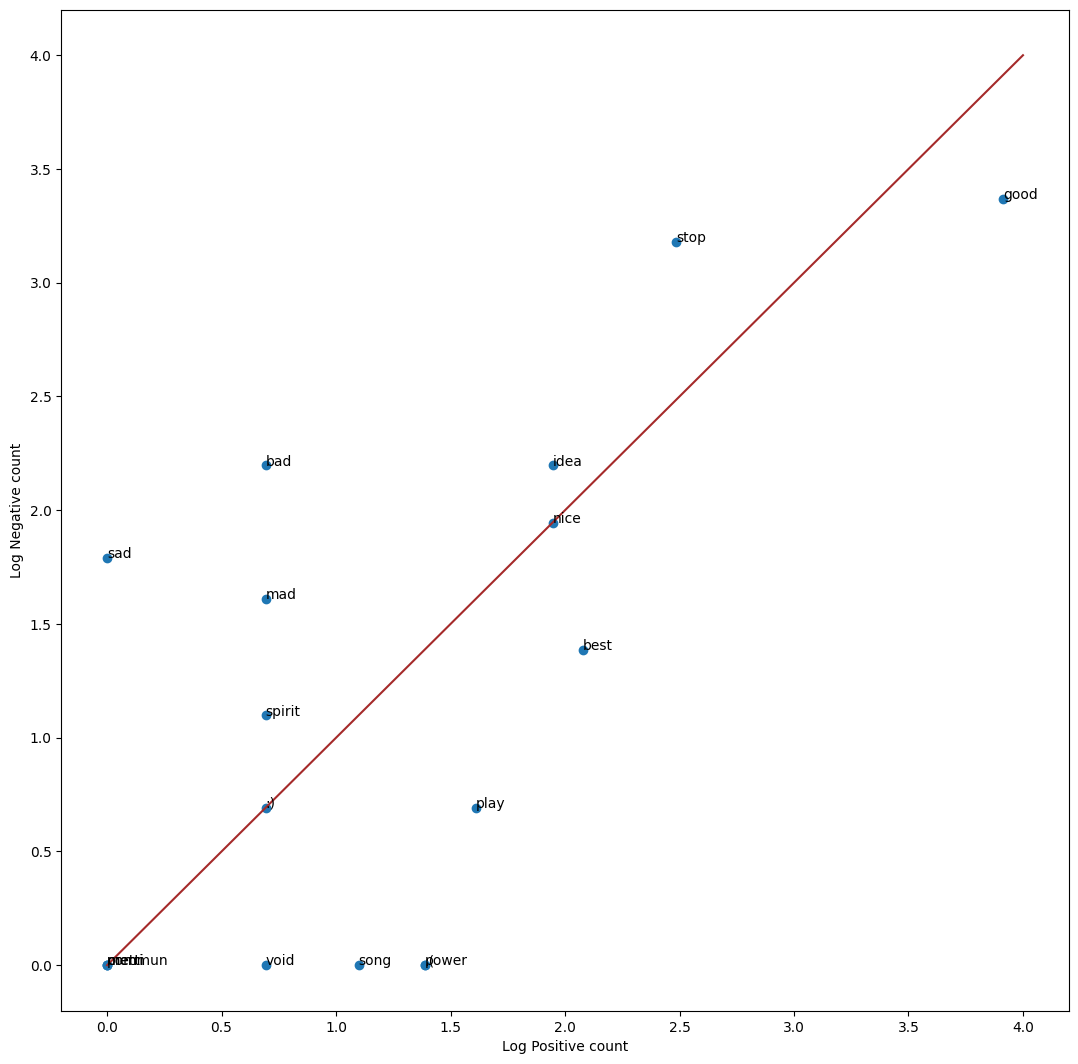

In [37]:
fig, ax = plt.subplots(figsize = (13, 13))

# convert positive raw counts to logarithmic scale. we add 1 to avoid log(0)
x = np.log([x[1] + 1 for x in data])

# do the same for the negative counts
y = np.log([x[2] + 1 for x in data])

# Plot a dot for each pair of words
ax.scatter(x, y)

# assign axis labels
plt.xlabel("Log Positive count")
plt.ylabel("Log Negative count")

# Add the word as the label at the same position as you added the points just before
for i in range(0, len(data)):
    ax.annotate(data[i][0], (x[i], y[i]), fontsize=10)

ax.plot([0, 4], [0, 4], color = 'brown') # Plot the red line that divides the 2 areas.
plt.show()

In [38]:
def extract_features(tweet, freqs):
    # process_tweet tokenizes, stems, and removes stopwords
    word_l = process_tweet(tweet)
    # 3 elements in the form of a 1 x 3 vector
    x = np.zeros((1, 3))

    #bias term is set to 1
    x[0,0] = 1

    # loop through each word in the list of words
    for word in word_l:

        # increment the word count for the positive label 1
        x[0,1] += freqs.get((word, 1.0),0)

        # increment the word count for the negative label 0
        x[0,2] += freqs.get((word, 0.0),0)

    assert(x.shape == (1, 3))
    return x

### Example 1: feature extraction for a tweet

In [39]:
train_x = training_tweets
tmp1 = extract_features(train_x[0], freqs)
print(tmp1)

[[1.00e+00 2.26e+03 2.44e+03]]


### Example 2: feature extraction for a random string

In [40]:
tmp2 = extract_features('This batch is the best batch', freqs)
print(tmp2)

[[ 1. 11.  3.]]


### Preparing training data

In [41]:
# collect the features 'x' and stack them into a matrix 'X'
X = np.zeros((len(train_x), 3))
for i in range(len(train_x)):
    X[i, :]= extract_features(train_x[i], freqs)

# training labels corresponding to X
train_y = np.append(np.ones((len(positive_train), 1)), np.zeros((len(negative_train), 1)), axis=0)
Y = np.ravel(train_y,order='C')



## 1.6 Using the most basic model to classify




<details>
<summary>
    <font size="3" color=""><b>Answer</b></font>
</summary>
<p>
<ul>
    <li>Logistic Regression.</li>
</ul>
</p>

In [42]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.6743725231175693


Logistic Regression with L1 Regularization

In [43]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(C = 0.1,solver= 'saga', penalty= 'l1', max_iter = 500).fit(X, Y)

print("Training Accuracy: ",clf.score(X, Y))

Training Accuracy:  0.6829590488771466


Official Documentation: [Here](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html)

**Solver:** It is an algorithm to use in optimization problem.

- For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;

- For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

- ‘liblinear’ is limited to one-versus-rest schemes.

- L1 penalty is only possible with 'saga' and 'liblinear' solver

- ‘sag’ and ‘saga’ fast convergence is only guaranteed on features with approximately the same scale.

**Penalty:** We can add 'l1', 'l2', 'elasticnet' regularization term to the problem.

**C:** It is an inverse of Regularization Strength.



### Check performance on test set

In [44]:
# Testing
testing_tweets = positive_test + negative_test

test_X = np.zeros((len(testing_tweets), 3))
for i in range(len(testing_tweets)):
    test_X[i, :]= extract_features(testing_tweets[i], freqs)

# training labels corresponding to X
test_y = np.append(np.ones((len(positive_test), 1)), np.zeros((len(negative_test), 1)), axis=0)
test_Y = np.ravel(test_y,order='C')

print("Testing Accuracy: ",clf.score(test_X, test_Y))

Testing Accuracy:  0.5789473684210527


### Predict whether a tweet is positive or negative.

**Note:** classify 1, for a positive sentiment, and 0, for a negative sentiment.

In [45]:
def predict_custom_tweet(tweet, freqs):
    x = extract_features(tweet,freqs)
    y_pred = clf.predict(x)
    return y_pred

# test your function
list_of_tweets = ['\033[92m'+'Thank God coronovirus is over',
                  '\033[91m'+'This is seriously ridiculous. Stop hoarding',
                  '\033[92m'+'Government efforts are great.',
                  '\033[93m'+'Nonsense', #anomaly in classification
                  '\033[91m'+'Panic-buying is pushing up prices.#coronavirus',
                  '\033[92m'+'THANK YOU to make hand sanitizer in distillery amid outbreak']

for tweet in list_of_tweets:
    print( '%s -> %f' % (tweet, predict_custom_tweet(tweet, freqs)))

Thank God coronovirus is over -> 1.000000
This is seriously ridiculous. Stop hoarding -> 0.000000
Government efforts are great. -> 1.000000
Nonsense -> 0.000000
Panic-buying is pushing up prices.#coronavirus -> 0.000000
THANK YOU to make hand sanitizer in distillery amid outbreak -> 1.000000


<ipython-input-45-cb1f0bb2edad>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-45-cb1f0bb2edad>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-45-cb1f0bb2edad>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)

<ipython-input-45-cb1f0bb2edad>:15: DeprecationWarning:

Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this o